In [1]:
# Importing the packages
import pandas as pd
import numpy as np

# Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
acq = pd.read_csv(r"C:\Users\bless\OneDrive\Desktop\Data Science\Python\Case Studies\Python Foundation Case Study 2 - Credit Card Case Study\Case Study 2 - Credit Card Case Study\Customer Acqusition.csv")

In [3]:
rep = pd.read_csv(r"C:\Users\bless\OneDrive\Desktop\Data Science\Python\Case Studies\Python Foundation Case Study 2 - Credit Card Case Study\Case Study 2 - Credit Card Case Study\Repayment.csv")

In [4]:
spend = pd.read_csv(r"C:\Users\bless\OneDrive\Desktop\Data Science\Python\Case Studies\Python Foundation Case Study 2 - Credit Card Case Study\Case Study 2 - Credit Card Case Study\spend.csv")

In [5]:
acq.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [6]:
rep.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [7]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [8]:
merged_df = pd.merge(acq, rep, left_on='Customer', right_on='Customer', how='outer')

In [9]:
merged_df.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,NaN
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02,NaN
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06,NaN
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12,NaN
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88,NaN


In [10]:
final = pd.merge(merged_df, spend, left_on='Customer', right_on='Customer', how='outer')

# 1a. In case age is less than 18, replace it with mean of age values.

In [11]:

# Calculate the mean of non-missing age values
mean_age = final[final['Age'] >= 18]['Age'].mean()

# Replace age values less than 18 with the calculated mean
final['Age'] = final['Age'].apply(lambda age: mean_age if age < 18 else age)

# b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
# (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [12]:
# Define a custom function to replace spend amounts
def replace_spend_amount(row):
    if row['Amount_y'] > row['Limit']:
        return 0.5 * row['Limit']
    else:
        return row['Amount_y']

# Apply the custom function to the 'Amount_y' column
final['Amount_y'] = final.apply(replace_spend_amount, axis=1)

In [13]:
final.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month_x,Amount_x,Unnamed: 4,Sl No:,Month_y,Type,Amount_y
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,NaN,1.0,12-Jan-04,JEWELLERY,485470.80
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,NaN,2.0,3-Jan-04,PETRO,410556.13
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,NaN,3.0,15-Jan-04,CLOTHES,23740.46
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,NaN,4.0,25-Jan-04,FOOD,484342.47
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,NaN,5.0,17-Jan-05,CAMERA,369694.07


In [14]:
# c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

def replace_repayment_amount(row):
    if row['Amount_x'] > row['Limit']:
        return row['Limit']
    else:
        return row['Amount_x']
    
# Apply the custom function to the 'Amount_x' column
final['Amount_x'] = final.apply(replace_repayment_amount, axis=1)


In [15]:
# 2. From the above dataset create the following summaries:
# a. How many distinct customers exist?

distinct_customers = final['Customer'].nunique()
print(f"Number of distinct customers: {distinct_customers}")

Number of distinct customers: 100


In [16]:
#  b. How many distinct categories exist?

distinct_categories = final['Type'].nunique()
print(f"Number of distinct categories: {distinct_categories}")

Number of distinct categories: 15


In [17]:
# c. What is the average monthly spend by customers?

# first find list of customer spend monthwise
average_monthly_spend = final.groupby(['Customer', 'Month_y'])['Amount_y'].sum().mean()

print(f"Average monthly spend by customers: {average_monthly_spend}")

Average monthly spend by customers: 4572782.527947495


In [18]:
final.rename(columns={'Month_x': 'Repayment_Date', 'Amount_x': 'Repayment_amount', 'Month_y': 'spend_date', 'Amount_y': 'spend_amount'}, inplace=True)

In [19]:
final.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Repayment_Date,Repayment_amount,Unnamed: 4,Sl No:,spend_date,Type,spend_amount
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,NaN,1.0,12-Jan-04,JEWELLERY,485470.80
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,NaN,2.0,3-Jan-04,PETRO,410556.13
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,NaN,3.0,15-Jan-04,CLOTHES,23740.46
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,NaN,4.0,25-Jan-04,FOOD,484342.47
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,NaN,5.0,17-Jan-05,CAMERA,369694.07


In [20]:
# Extract the month from the 'spend_date' column and calculate the average spend
final['spend_date'] = pd.to_datetime(final['spend_date'], format='%d-%b-%y')
final['Month'] = final['spend_date'].dt.month

average_monthly_spend = final.groupby(['Customer', 'Month'])['spend_amount'].mean()

print(average_monthly_spend)

Customer  Month
A1        1.0      372762.587143
          2.0      175235.690000
          4.0      261649.250000
          5.0      361141.310000
          8.0      344372.100000
                       ...      
A95       1.0      240401.500000
A96       1.0       54729.660000
A97       1.0        5000.000000
A98       1.0        5000.500000
A99       1.0        5001.000000
Name: spend_amount, Length: 578, dtype: float64


In [21]:
#  d. What is the average monthly repayment by customers?

final['Repayment_Date'] = pd.to_datetime(final['Repayment_Date'], format = '%d-%b-%y')
# Extract month
final['Month'] = final['Repayment_Date'].dt.month

average_monthly_repayment = final.groupby(['Customer','Month'])['Repayment_amount'].mean()

print(average_monthly_repayment)

Customer  Month
A1        1.0      343972.327143
          2.0      156374.760000
          4.0      254474.580000
          7.0      297176.740000
          9.0      186427.500000
                       ...      
A95       1.0      369405.960000
A96       1.0      100000.000000
A97       1.0       10000.000000
A98       1.0       10001.000000
A99       1.0       10002.000000
Name: Repayment_amount, Length: 558, dtype: float64


In [22]:
# e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?

# Convert 'Repayment_amount' and 'spend_amount' columns to numeric values
final['Repayment_amount'] = pd.to_numeric(final['Repayment_amount'], errors='coerce')
final['spend_amount'] = pd.to_numeric(final['spend_amount'], errors='coerce')

# Calculate Monthly Profit (Monthly repayment - Monthly spend)
final['Monthly_Profit'] = final['Repayment_amount'] - final['spend_amount']

# Define the monthly interest rate (2.9% or 0.029)
monthly_interest_rate = 0.029

# Calculate Profit based on the given conditions (Interest earned only on positive profits)
final['Monthly_Profit'] = final['Monthly_Profit'].apply(lambda x: max(x, 0))
final['Profit'] = final['Monthly_Profit'] * monthly_interest_rate

# Display the result
print(final[['Customer', 'spend_date', 'Repayment_amount', 'spend_amount', 'Monthly_Profit', 'Profit']])

      Customer spend_date  Repayment_amount  spend_amount  Monthly_Profit  \
0           A1 2004-01-12         495414.75     485470.80         9943.95   
1           A1 2004-01-03         495414.75     410556.13        84858.62   
2           A1 2004-01-15         495414.75      23740.46       471674.29   
3           A1 2004-01-25         495414.75     484342.47        11072.28   
4           A1 2005-01-17         495414.75     369694.07       125720.68   
...        ...        ...               ...           ...             ...   
37302      NaN        NaT               NaN           NaN             NaN   
37303      NaN        NaT               NaN           NaN             NaN   
37304      NaN        NaT               NaN           NaN             NaN   
37305      NaN        NaT               NaN           NaN             NaN   
37306      NaN        NaT               NaN           NaN             NaN   

            Profit  
0        288.37455  
1       2460.89998  
2      13678

In [23]:
# f. What are the top 5 product types?

top_product_types = final['Type'].value_counts().head(5)

print(top_product_types)

PETRO           4829
CAMERA          4237
FOOD            4056
AIR TICKET      3537
TRAIN TICKET    3387
Name: Type, dtype: int64


In [24]:
# g. Which city is having maximum spend?

max_spend_amount = final.groupby(['Customer', 'City'])['spend_amount'].sum()

max_spend_amount.head(1)

Customer  City     
A1        BANGALORE    92568649.68
Name: spend_amount, dtype: float64

In [25]:
#  h. Which age group is spending more money?

age_spend = final.groupby(['Customer', 'Age'])['spend_amount'].sum()

age_spend.head(1)



Customer  Age 
A1        76.0    92568649.68
Name: spend_amount, dtype: float64

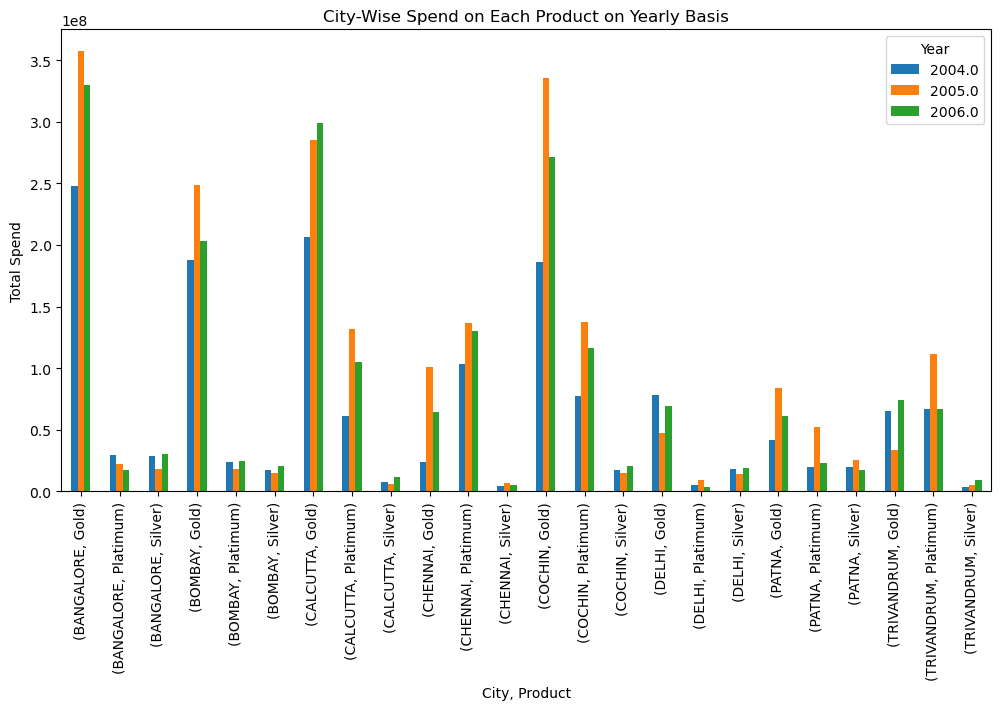

In [26]:
# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

# Convert 'spend_date' to a pandas datetime object and extract the year
final['spend_date'] = pd.to_datetime(final['spend_date'], format='%d-%b-%y')
final['Year'] = final['spend_date'].dt.year

# Group the data by 'City', 'Product', and 'Year', and calculate the total spend
city_spend = final.groupby(['City', 'Product', 'Year'])['spend_amount'].sum().reset_index()

# Create a graphical representation using pandas
pivot_table = city_spend.pivot_table(index=['City', 'Product'], columns='Year', values='spend_amount', fill_value=0)
pivot_table.plot(kind='bar', figsize=(12, 6))

plt.title("City-Wise Spend on Each Product on Yearly Basis")
plt.xlabel("City, Product")
plt.ylabel("Total Spend")
plt.legend(title="Year")
plt.show()

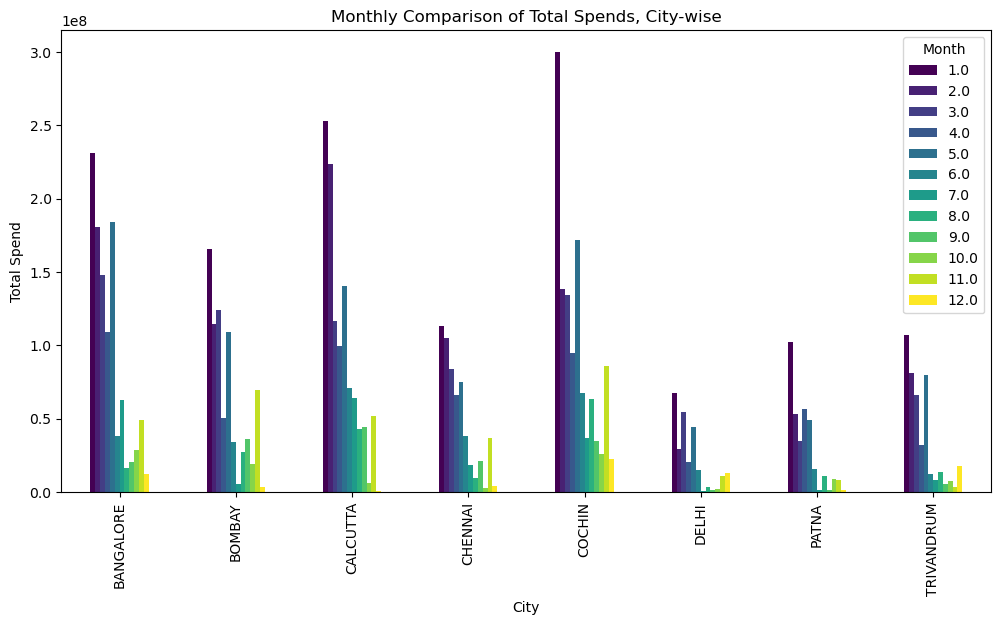

In [27]:
# 4. Create graphs for a Monthly comparison of total spends, city wise

# Convert 'spend_date' to a pandas datetime object and extract the year and month
final['spend_date'] = pd.to_datetime(final['spend_date'], format='%d-%b-%y')
final['Month'] = final['spend_date'].dt.month

# Group the data by 'City', 'Year', and 'Month' and calculate the total spend
city_monthly_spend = final.groupby(['City', 'Month'])['spend_amount'].sum().reset_index()

# Pivot the data for plotting
pivot_table = city_monthly_spend.pivot(index=['City'], columns='Month', values='spend_amount')

# Create the graphs using pandas
pivot_table.plot(kind='bar', figsize=(12, 6), colormap='viridis')

plt.title("Monthly Comparison of Total Spends, City-wise")
plt.xlabel("City")
plt.ylabel("Total Spend")
plt.legend(title="Month")
plt.show()

In [27]:
# b. Comparison of yearly spend on air tickets

# Convert 'spend_date' to a pandas datetime object and extract the year
final['spend_date'] = pd.to_datetime(final['spend_date'], format='%d-%b-%y')
final['Year'] = final['spend_date'].dt.year

# Create a boolean mask to filter rows where 'Type' is 'Air Ticket'
air_ticket_mask = final['Type'] == 'Air Ticket'

# Check if there is any data that matches the filter condition
if air_ticket_mask.any():
    # Group the data by 'Year' and calculate the total spend for air tickets
    air_ticket_yearly_spend = final[air_ticket_mask].groupby('Year')['spend_amount'].sum()

    # Create a bar plot for yearly spend on air tickets
    air_ticket_yearly_spend.plot(kind='bar', figsize=(10, 6))

    plt.title("Yearly Spend on Air Tickets")
    plt.xlabel("Year")
    plt.ylabel("Total Spend")
    plt.show()
else:
    print("No data for 'Air Ticket' found in the dataset.")

No data for 'Air Ticket' found in the dataset.


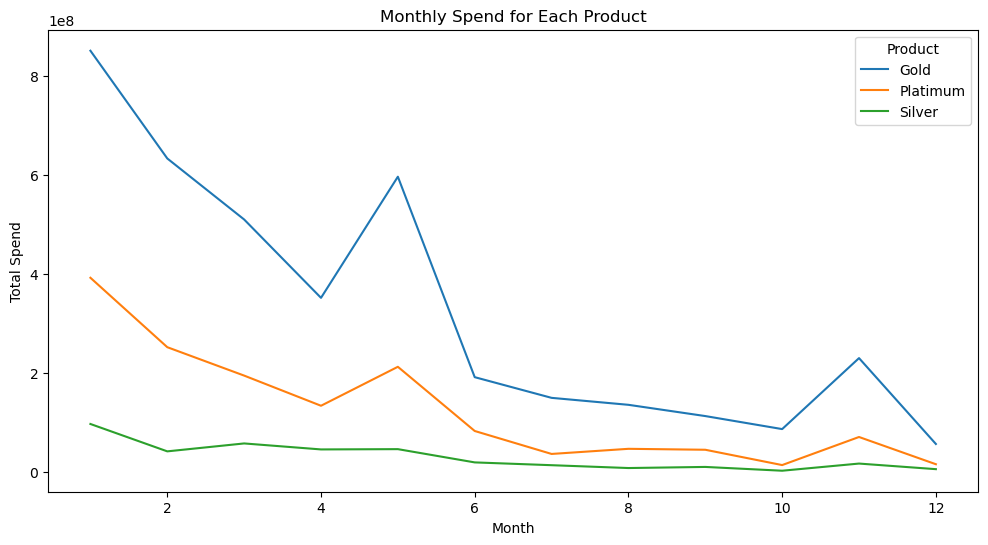

In [28]:
# c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

# Convert 'spend_date' to a pandas datetime object and extract the month
final['spend_date'] = pd.to_datetime(final['spend_date'], format='%d-%b-%y')
final['Month'] = final['spend_date'].dt.month

# Group the data by 'Product' and 'Month' and calculate the total spend
product_monthly_spend = final.groupby(['Product', 'Month'])['spend_amount'].sum().reset_index()

# Pivot the data for plotting
pivot_table = product_monthly_spend.pivot(index='Month', columns='Product', values='spend_amount')

# Create the graph using pandas
pivot_table.plot(kind='line', figsize=(12, 6))

plt.title("Monthly Spend for Each Product")
plt.xlabel("Month")
plt.ylabel("Total Spend")
plt.legend(title="Product")
plt.show()

# 5. Write user defined PYTHON function to perform the following analysis: 
#  You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the  function should automatically take these inputs while identifying the top 10 customers


In [28]:
import pandas as pd

# Convert the repayment date column to a datetime column
final['Repayment_Date'] = pd.to_datetime(final['Repayment_Date'])

# Create separate columns for year and month
final['Year'] = final['Repayment_Date'].dt.year
final['Month'] = final['Repayment_Date'].dt.month

# Get user input for product and time period
product = input("Please enter the product (Gold/Silver/Platinum): ").lower()
time_period = input("Please enter the time period (yearly/monthly): ").lower()

# Filter the data based on user input
if time_period == 'yearly':
    final = final.groupby(['City', 'Product', 'Year', 'Customer'])['Repayment_amount'].sum().reset_index()
else:
    final = final.groupby(['City', 'Product', 'Year', 'Month', 'Customer'])['Repayment_amount'].sum().reset_index()

final = final[final['Product'].str.lower() == product]

# Get the top 10 customers for each city
top_10_customers = final.groupby(['City', 'Product', 'Year', 'Month']).apply(lambda x: x.nlargest(10, 'Repayment_amount')).reset_index(drop=True)

print(top_10_customers)

Please enter the product (Gold/Silver/Platinum): Gold
Please enter the time period (yearly/monthly): 2005/Mar
           City Product    Year  Month Customer  Repayment_amount
0     BANGALORE    Gold  2004.0    1.0      A43       59101421.57
1     BANGALORE    Gold  2004.0    1.0      A13       50457725.67
2     BANGALORE    Gold  2004.0    1.0       A1       40353001.38
3     BANGALORE    Gold  2004.0    1.0      A14       30786560.97
4     BANGALORE    Gold  2004.0    1.0      A30       10246832.10
..          ...     ...     ...    ...      ...               ...
300  TRIVANDRUM    Gold  2006.0    2.0      A28        8607920.76
301  TRIVANDRUM    Gold  2006.0    3.0      A28       41770832.22
302  TRIVANDRUM    Gold  2006.0    4.0      A28        3113821.17
303  TRIVANDRUM    Gold  2006.0    5.0      A28       25111939.95
304  TRIVANDRUM    Gold  2006.0    7.0      A28       10272430.80

[305 rows x 6 columns]


In [21]:
final.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment', 'SL No:', 'Month_x', 'Amount_x', 'Unnamed: 4', 'Sl No:',
       'Month_y', 'Type', 'Amount_y'],
      dtype='object')